# Global Air Quality & Pollution

🌍 Dataset: Global Air Quality Data

Skills: Environmental data, time series, geospatial

## Questions to answer:

    - Plot the average PM2.5 levels per year in the US.

    - Which city has the worst average air quality?

    - Which states had the cleanest air in 2019?

    - Compare CO levels between California and New York.

    - Is there a seasonal trend in air pollution levels?

    - Plot a line chart of ozone levels in Los Angeles across 5 years.

    - Compute the correlation between NO2, CO, and O3.

    - Which state has shown the most improvement in air quality over time?

    - Build a heatmap of pollution by state.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [6]:
air_data = pd.read_csv('data/pollution_us_2000_2016.csv')

air_data.head(4)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0


In [7]:
columns = air_data.columns
columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [8]:
air_data.drop(columns=['Unnamed: 0'], inplace=True)


In [9]:
air_data.head(3)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN


In [10]:
# count the NaN

air_data.isna().count()

State Code           1746661
County Code          1746661
Site Num             1746661
Address              1746661
State                1746661
County               1746661
City                 1746661
Date Local           1746661
NO2 Units            1746661
NO2 Mean             1746661
NO2 1st Max Value    1746661
NO2 1st Max Hour     1746661
NO2 AQI              1746661
O3 Units             1746661
O3 Mean              1746661
O3 1st Max Value     1746661
O3 1st Max Hour      1746661
O3 AQI               1746661
SO2 Units            1746661
SO2 Mean             1746661
SO2 1st Max Value    1746661
SO2 1st Max Hour     1746661
SO2 AQI              1746661
CO Units             1746661
CO Mean              1746661
CO 1st Max Value     1746661
CO 1st Max Hour      1746661
CO AQI               1746661
dtype: int64

In [11]:
air_data.describe()

,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [12]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State Code         int64  
 1   County Code        int64  
 2   Site Num           int64  
 3   Address            object 
 4   State              object 
 5   County             object 
 6   City               object 
 7   Date Local         object 
 8   NO2 Units          object 
 9   NO2 Mean           float64
 10  NO2 1st Max Value  float64
 11  NO2 1st Max Hour   int64  
 12  NO2 AQI            int64  
 13  O3 Units           object 
 14  O3 Mean            float64
 15  O3 1st Max Value   float64
 16  O3 1st Max Hour    int64  
 17  O3 AQI             int64  
 18  SO2 Units          object 
 19  SO2 Mean           float64
 20  SO2 1st Max Value  float64
 21  SO2 1st Max Hour   int64  
 22  SO2 AQI            float64
 23  CO Units           object 
 24  CO Mean            float64
 25  CO 1st Max Value  

In [13]:
# non-null counts

air_data.isnull().count()

State Code           1746661
County Code          1746661
Site Num             1746661
Address              1746661
State                1746661
County               1746661
City                 1746661
Date Local           1746661
NO2 Units            1746661
NO2 Mean             1746661
NO2 1st Max Value    1746661
NO2 1st Max Hour     1746661
NO2 AQI              1746661
O3 Units             1746661
O3 Mean              1746661
O3 1st Max Value     1746661
O3 1st Max Hour      1746661
O3 AQI               1746661
SO2 Units            1746661
SO2 Mean             1746661
SO2 1st Max Value    1746661
SO2 1st Max Hour     1746661
SO2 AQI              1746661
CO Units             1746661
CO Mean              1746661
CO 1st Max Value     1746661
CO 1st Max Hour      1746661
CO AQI               1746661
dtype: int64

In [14]:
air_data.isnull().sum()

State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [15]:
air_data.dtypes

State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

In [16]:
# Convert the date to datetime

air_data['Date Local'] = pd.to_datetime(air_data['Date Local'])
air_data.head(3)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN


In [17]:
air_data.dtypes

State Code                    int64
County Code                   int64
Site Num                      int64
Address                      object
State                        object
County                       object
City                         object
Date Local           datetime64[ns]
NO2 Units                    object
NO2 Mean                    float64
NO2 1st Max Value           float64
NO2 1st Max Hour              int64
NO2 AQI                       int64
O3 Units                     object
O3 Mean                     float64
O3 1st Max Value            float64
O3 1st Max Hour               int64
O3 AQI                        int64
SO2 Units                    object
SO2 Mean                    float64
SO2 1st Max Value           float64
SO2 1st Max Hour              int64
SO2 AQI                     float64
CO Units                     object
CO Mean                     float64
CO 1st Max Value            float64
CO 1st Max Hour               int64
CO AQI                      

In [18]:
# Fill CO AQI with the mean

CO_AQI_mean = round(air_data['CO AQI'].mean(), 2)

air_data['CO AQI'] = air_data['CO AQI'].fillna(CO_AQI_mean)

air_data.head(3)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,6.0
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,6.0


In [19]:
# Fill missing SO2 AQI with the mean of SO2 AQI

SO2_AQI_mean = round(air_data['SO2 AQI'].mean(), 2)

air_data['SO2 AQI'] = air_data['SO2 AQI'].fillna(SO2_AQI_mean)
air_data.head(10)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.00,Parts per million,1.145833,4.2,21,6.0
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.00,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,7.12,Parts per million,1.145833,4.2,21,6.0
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,7.12,Parts per million,0.878947,2.2,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.00,Parts per million,0.850000,1.6,23,6.0
5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.00,Parts per million,1.066667,2.3,0,26.0
6,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.937500,2.6,23,7.12,Parts per million,0.850000,1.6,23,6.0
7,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.937500,2.6,23,7.12,Parts per million,1.066667,2.3,0,26.0
8,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,...,Parts per billion,5.250000,11.0,19,16.00,Parts per million,1.929167,4.4,8,6.0
9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,...,Parts per billion,5.250000,11.0,19,16.00,Parts per million,1.762500,2.5,8,28.0


In [20]:
# Check for missing values after cleaning

air_data.isnull().sum()

State Code           0
County Code          0
Site Num             0
Address              0
State                0
County               0
City                 0
Date Local           0
NO2 Units            0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Units             0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Units            0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Units             0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

In [21]:
# extract the day, month , year

air_data['Month'] = air_data['Date Local'].dt.month
air_data['Year'] = air_data['Date Local'].dt.year
air_data['Month Name'] = air_data['Date Local'].dt.month_name()
air_data['Day'] = air_data['Date Local'].dt.day


In [22]:
air_data.tail(3)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Month,Year,Month Name,Day
1746658,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.93913,...,0.00,Parts per million,0.100000,0.100,0,1.0,3,2016,March,31
1746659,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.93913,...,7.12,Parts per million,0.067714,0.127,0,6.0,3,2016,March,31
1746660,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.93913,...,7.12,Parts per million,0.100000,0.100,0,1.0,3,2016,March,31


In [23]:
# Weekend Flag

air_data['Day Name'] = air_data['Date Local'].dt.day_name()
air_data['IsWeekend'] = np.where(air_data['Day Name'].isin(['Saturday', 'Sunday']), 'Weekend', 'Weekday')
air_data.head(10)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Month,Year,Month Name,Day,Day Name,IsWeekend
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,1.145833,4.2,21,6.0,1,2000,January,1,Saturday,Weekend
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,0.878947,2.2,23,25.0,1,2000,January,1,Saturday,Weekend
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,1.145833,4.2,21,6.0,1,2000,January,1,Saturday,Weekend
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,0.878947,2.2,23,25.0,1,2000,January,1,Saturday,Weekend
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,0.850000,1.6,23,6.0,1,2000,January,2,Sunday,Weekend
5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,1.066667,2.3,0,26.0,1,2000,January,2,Sunday,Weekend
6,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,0.850000,1.6,23,6.0,1,2000,January,2,Sunday,Weekend
7,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,1.066667,2.3,0,26.0,1,2000,January,2,Sunday,Weekend
8,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,...,1.929167,4.4,8,6.0,1,2000,January,3,Monday,Weekday
9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,...,1.762500,2.5,8,28.0,1,2000,January,3,Monday,Weekday


In [24]:
# USA season classification
air_data['Seasons'] = np.where(air_data['Month'].isin(['December', 'January', 'February']), 'Winter',
                        np.where(air_data['Month'].isin(['March', 'April', 'May']), 'Spring',
                        np.where(air_data['Month'].isin(['June', 'July', 'August']), 'Summer', 'Fall')))
air_data.tail(5)

/home/dukelester/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,CO 1st Max Value,CO 1st Max Hour,CO AQI,Month,Year,Month Name,Day,Day Name,IsWeekend,Seasons
1746656,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,1.083333,...,0.100,2,1.0,3,2016,March,30,Wednesday,Weekday,Fall
1746657,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,...,0.127,0,6.0,3,2016,March,31,Thursday,Weekday,Fall
1746658,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,...,0.100,0,1.0,3,2016,March,31,Thursday,Weekday,Fall
1746659,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,...,0.127,0,6.0,3,2016,March,31,Thursday,Weekday,Fall
1746660,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,...,0.100,0,1.0,3,2016,March,31,Thursday,Weekday,Fall


1. Plot the average PM2.5 levels per year in the US.

In [25]:
air_data.columns

Index(['State Code', 'County Code', 'Site Num', 'Address', 'State', 'County',
       'City', 'Date Local', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI',
       'Month', 'Year', 'Month Name', 'Day', 'Day Name', 'IsWeekend',
       'Seasons'],
      dtype='object')

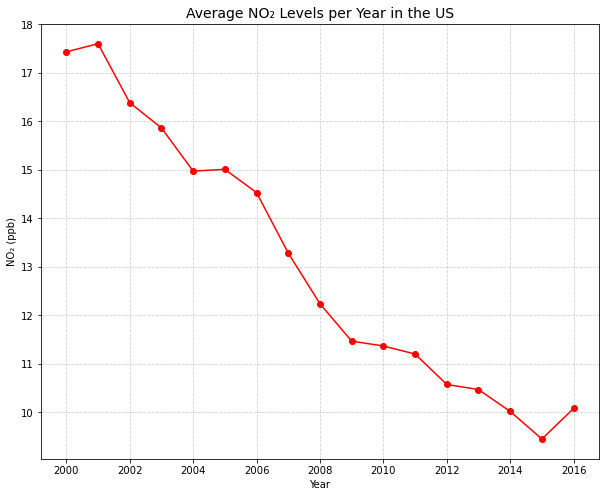

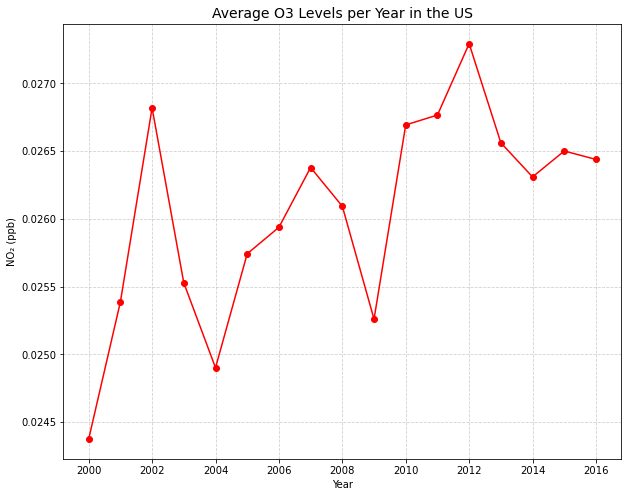

In [26]:
grouped_by_year = air_data.groupby(by='Year')['NO2 Mean'].mean()
grouped_by_year

# Plot

plt.figure(figsize=(10, 8))

grouped_by_year.plot(kind='line', marker='o', color='red')
plt.title("Average NO₂ Levels per Year in the US", fontsize=14)
plt.xlabel("Year")
plt.ylabel("NO₂ (ppb)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(10, 8))
grouped_by_year_O3 = air_data.groupby(by='Year')['O3 Mean'].mean()
grouped_by_year_O3.plot(kind='line', marker='o', color='red')
plt.title("Average O3 Levels per Year in the US", fontsize=14)
plt.xlabel("Year")
plt.ylabel("NO₂ (ppb)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


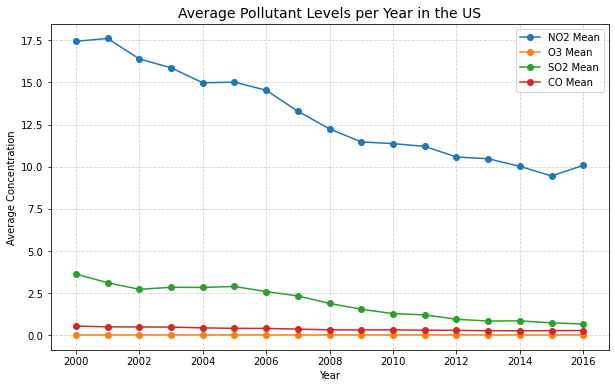

In [27]:
# Group by Year and calculate averages

pollutants = ["NO2 Mean", "O3 Mean", "SO2 Mean", "CO Mean"]
yearly_avg = air_data.groupby(by='Year')[pollutants].mean()

# Plot 

plt.figure(figsize=(10, 6))
for column in pollutants:
    plt.plot(yearly_avg.index, yearly_avg[column], marker='o', label=column)

plt.title("Average Pollutant Levels per Year in the US", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Concentration")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


2. Which city has the worst average air quality?

In [28]:
air_data.head(2)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,CO 1st Max Value,CO 1st Max Hour,CO AQI,Month,Year,Month Name,Day,Day Name,IsWeekend,Seasons
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,4.2,21,6.0,1,2000,January,1,Saturday,Weekend,Fall
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,2.2,23,25.0,1,2000,January,1,Saturday,Weekend,Fall


In [29]:
aqi_columns = ["NO2 AQI", "O3 AQI", "SO2 AQI", "CO AQI"]

# Compute the average AQI per city

city_aqi = air_data.groupby('City')[aqi_columns].mean()
city_aqi['Overall AQI'] = city_aqi.mean(axis=1)

worst_city = city_aqi['Overall AQI'].idxmax()
worst_value = city_aqi['Overall AQI'].max()

print(f"The worst city is {worst_city} with an average AQI of {worst_value:.2f}")


The worst city is Mexicali with an average AQI of 25.52


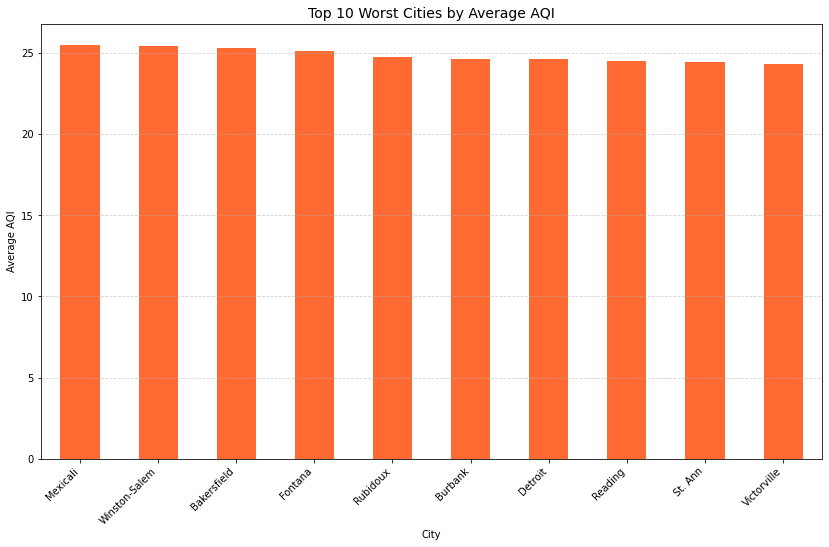

In [30]:
top_10_worst_cities = city_aqi['Overall AQI'].sort_values(ascending=False).head(10)
top_10_worst_cities

# Plot

plt.figure(figsize=(14, 8))
top_10_worst_cities.plot(kind='bar', color='orangered', alpha=0.8)
plt.title("Top 10 Worst Cities by Average AQI", fontsize=14)
plt.ylabel("Average AQI")
plt.xlabel("City")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


3. Which states had the cleanest air in 2016?

In [ ]:
aqi_columns = ["NO2 AQI", "O3 AQI", "SO2 AQI", "CO AQI"]
air_2016 = air_data[air_data['Year'] == 2016].copy()
group_by_state = air_2016.groupby('State')[aqi_columns].mean()

# Overall Air Quality
air_2016['Overall AQI'] = group_by_state.mean(axis=1)

group_by_state.head(2)

# Cleanest 
air_2016.head(3)

cleanest_states = group_by_state['Overall AQI'].sort_values().head(10)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,CO 1st Max Hour,CO AQI,Month,Year,Month Name,Day,Day Name,IsWeekend,Seasons,Overall AQI
1722057,1,73,23,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,2016-01-01,Parts per billion,2.520833,...,2,6.0,1,2016,January,1,Friday,Weekday,Fall,NaN
1722058,1,73,23,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,2016-01-01,Parts per billion,2.520833,...,7,1.0,1,2016,January,1,Friday,Weekday,Fall,NaN
1722059,1,73,23,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,2016-01-01,Parts per billion,2.520833,...,2,6.0,1,2016,January,1,Friday,Weekday,Fall,NaN


4. Compare CO levels between California and New York.

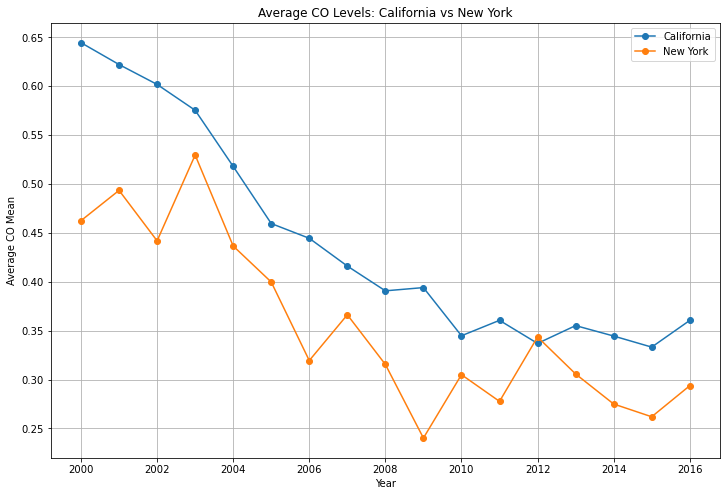

In [51]:
CO_states = air_data[air_data['State'].isin(['California', 'New York'])]

avg_per_year = CO_states.groupby(['Year', 'State'])['CO Mean'].mean().reset_index()

co_pivot = avg_per_year.pivot(index='Year', columns='State', values='CO Mean')

# Plot

plt.figure(figsize=(12, 8))
plt.plot(co_pivot.index, co_pivot['California'], marker='o', label='California')
plt.plot(co_pivot.index, co_pivot['New York'], marker='o', label='New York')

plt.title("Average CO Levels: California vs New York")
plt.xlabel("Year")
plt.ylabel("Average CO Mean")
plt.legend()
plt.grid(True)
plt.show()

6.  Plot a line chart of ozone levels in Alabama across 5 years.

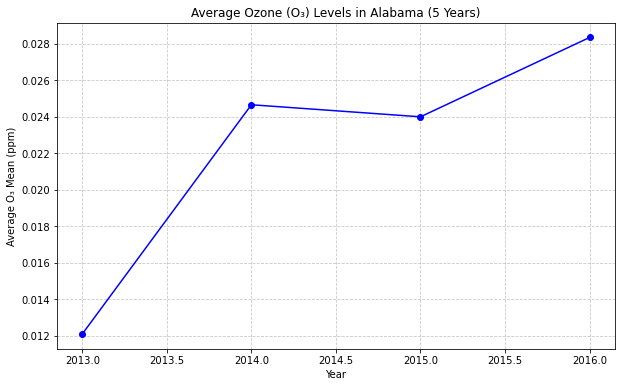

In [60]:
alabama = air_data[air_data['State'].str.contains('Alabama')]
ozone_alabama = alabama.groupby('Year')['O3 Mean'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(ozone_alabama['Year'],
        ozone_alabama['O3 Mean'],
        marker='o', linestyle="-",
        color="blue")
plt.title("Average Ozone (O₃) Levels in Alabama (5 Years)")
plt.xlabel("Year")
plt.ylabel("Average O₃ Mean (ppm)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [61]:
import seaborn as sns

7. Build a heatmap of pollution by state.

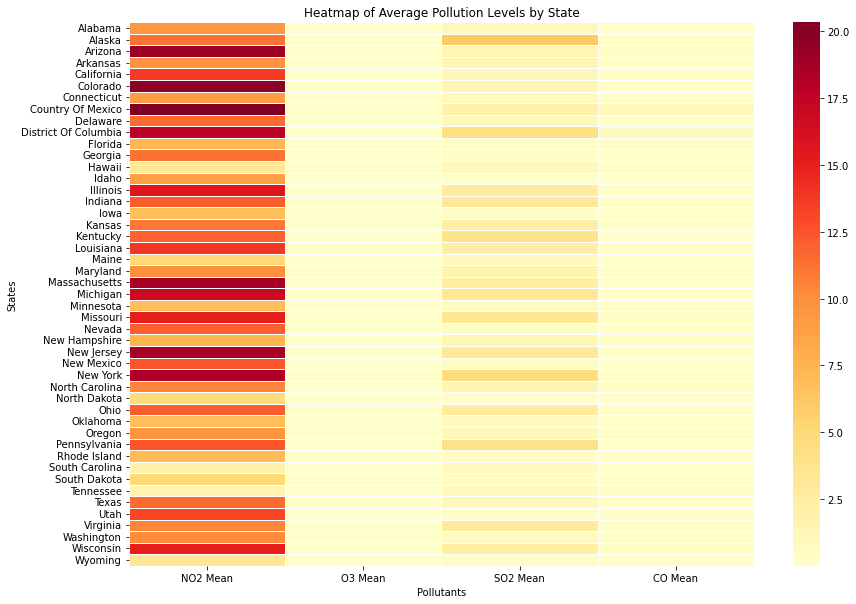

In [63]:
pollution_by_state = air_data.groupby('State')[["NO2 Mean", "O3 Mean", "SO2 Mean", "CO Mean"]].mean()
plt.figure(figsize=(14, 10))
sns.heatmap(pollution_by_state, cmap='YlOrRd', annot=False, linewidths=0.5)

plt.title("Heatmap of Average Pollution Levels by State")
plt.xlabel("Pollutants")
plt.ylabel("States")
plt.show()